<a href="https://colab.research.google.com/github/boyoung21/ESAA/blob/main/0519_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 차원 축소 - PCA, LDA, SVD, NMF

차원 축소: 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것

-> 더 직관적인 데이터 해석 가능, 학습 데이터의 크기가 줄어들어서 학습에 필요한 처리 능력도 줄일 수 있음


- 차원 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고, 희소한, 공간에 틈이 생긴 구조를 가지게 됨.
- 수백 개 이상의 피처로 구성된 데이터 세트의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어짐
- 피처가 많을 경우, 개별 피처 간에 상관관계가 높을 가능성 큼 -> 선형 회귀 같은 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우 다중 공선성 문제로 예측 성능 저하

1. 피처 선택
- 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고 데이터의 특징을 잘 나타내는 주요 피처만 선택

2. 피처(특성) 추출
- 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것
- 기존 피처가 압축된 것이라 기존 피처와는 완전히 다른 값 됨
- 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것, 기존 피처가 인지하기 어려웠던 잠재적인 요소를 추출하는 것을 의미

EX) 가령 학생을 평가하는 다양한 요소로 모의고사 성적, 종합 내신성적, 수 능성적, 봉사활동, 대외활동, 학교 내외 수상경력 등과 관련된 여러 가지 피처로 돼 있는 데이터 세트
라면 이를 학업 성취도, 커뮤니케이션 능력, 문세 해결력과 같은 더 함축적인 요약 득성으로 추출 가능

# PCA 개요

여러 변수 간 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법, 기존 데이터의 정보 유실이 최소화되어야 함

-> 이를 위해 PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 주성분이 됨. 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주한다는 의미.

PCA는 가장 큰 데이터 변동성을 기반으로 첫 번째 벡터축을 생성하고, 두 번째 축은 이 벡터 축에 직각이 되는 벡터를 축으로 함. 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 설정. 이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소됨.

**주성분 분석은 이처럼 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법**

# 선형대수 관점에서의 PCA

입력 데이터의 공분산 행렬을 고유값 분해하고, 이렇게 구한 고유벡터에 입력데이터를 선형 변환하는 것.
고윳값은 이 고유벡터의 크기를 나타내며, 동시에 입력 데이터의 분산을 나타냄.

선형 변환
- 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것.

공분산 행렬
- 공분산: 두 변수 간의 변동을 의미, 0보다 크다는 건 두 변수의 방향성이 같다는 것
- 공분산 행렬은 이런 여러 변수와 관련된 공분산을 포함하는 정방형 행렬
- 정방행렬(square matrix)임: 열과 행이 같은 행렬

 > 대칭행렬: 정방행렬 중 대각 원소를 중심으로 원소 값이 대칭되는 행렬, at = a, 항상 고유벡터를 직교행렬로, 고유값을 정방 행렬로 대각화할 수 있음

고유벡터: 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터를 의미. 여러 개가 존재하며, 정방 행렬은 최대 그 차원 수만큼의 고유벡터를 가질 수 있음. 2x2 행렬은 두 개의 고유벡터를, 3x3 행렬은 3개의 고유벡터 가질 수 있음

입력 데이터의 공분산 행렬 C 이를 이용하면 다음과 같이 분해할 수 있음.

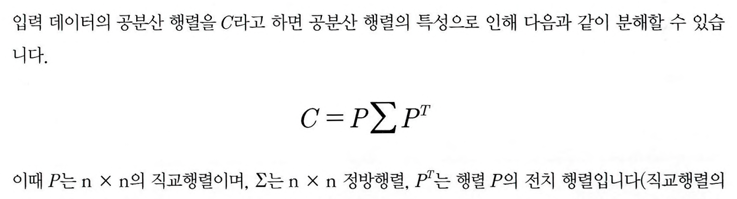

위 식은 고유벡터 행렬과 고유값 행렬로 다음과 같이 대응됨.
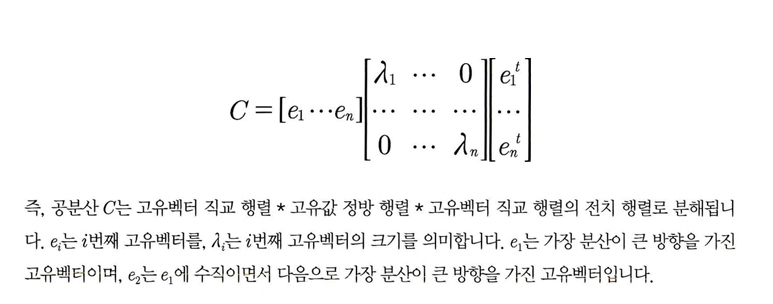

PCA 수행 순서

1. 입력 데이터 세트의 공분산 행렬을 생성
2. 공분산 행렬의 고유벡터와 고유값을 계산
3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼) 고유벡터를 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 반환

In [ ]:
# 아이리스 데이터 4개의 속성을 2개의 PCA 차원으로 압축하여 원본과 비교할 것

from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


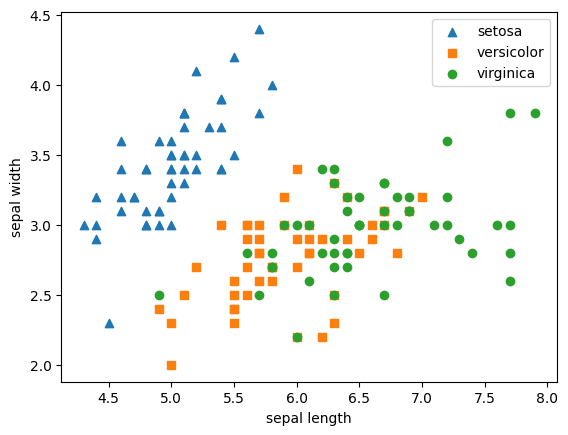

In [ ]:
# 각 품종에 따라 붓꽃 데이터 세트가 어떻게 분포돼 있는지 2차원으로 시각화
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target'] == i]['sepal_length']
    y_axis_data = irisDF[irisDF['target'] == i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

s

In [ ]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [ ]:
# PCA 변환된 데이터의 칼럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


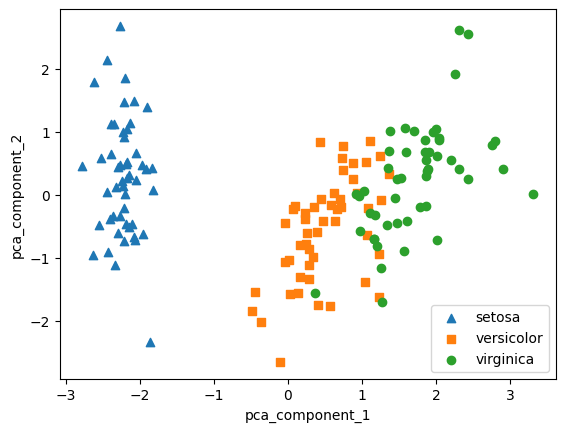

In [ ]:
# setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers = ['^', 's', 'o']

# pca_component_1을 x축, pc_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target'] == i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도: ', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도:  [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [ ]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도: ', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도:  [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


# default of credit card clients

In [27]:
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel('pca_credit_card.xls', header = 1, sheet_name = 'Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


신용카드 데이터 세트는 30,000개의 레코드와 24개의 속성을 가짐

'default payment next month' : Target, 다음달 연체 여부를 의미
- 연체일 경우 1, 정상납부는 0
- 원본 데이터 세트에 PAY_0 다음에 PAY_2 칼럼이 있으므로 PAY_0 칼럼을 PAY_1 으로
칼럼명을 변환하고 default payment next month 칼럼도 칼럼명이 너무 길어서 default로 칼럼명
을 변경.

Target 속성인 ‘default’ 칼럼을 y_target 변수로 별도로 저장

피처 데이터는 target 제외

In [28]:
df.rename(columns={'PAY_0' : 'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

<Axes: >

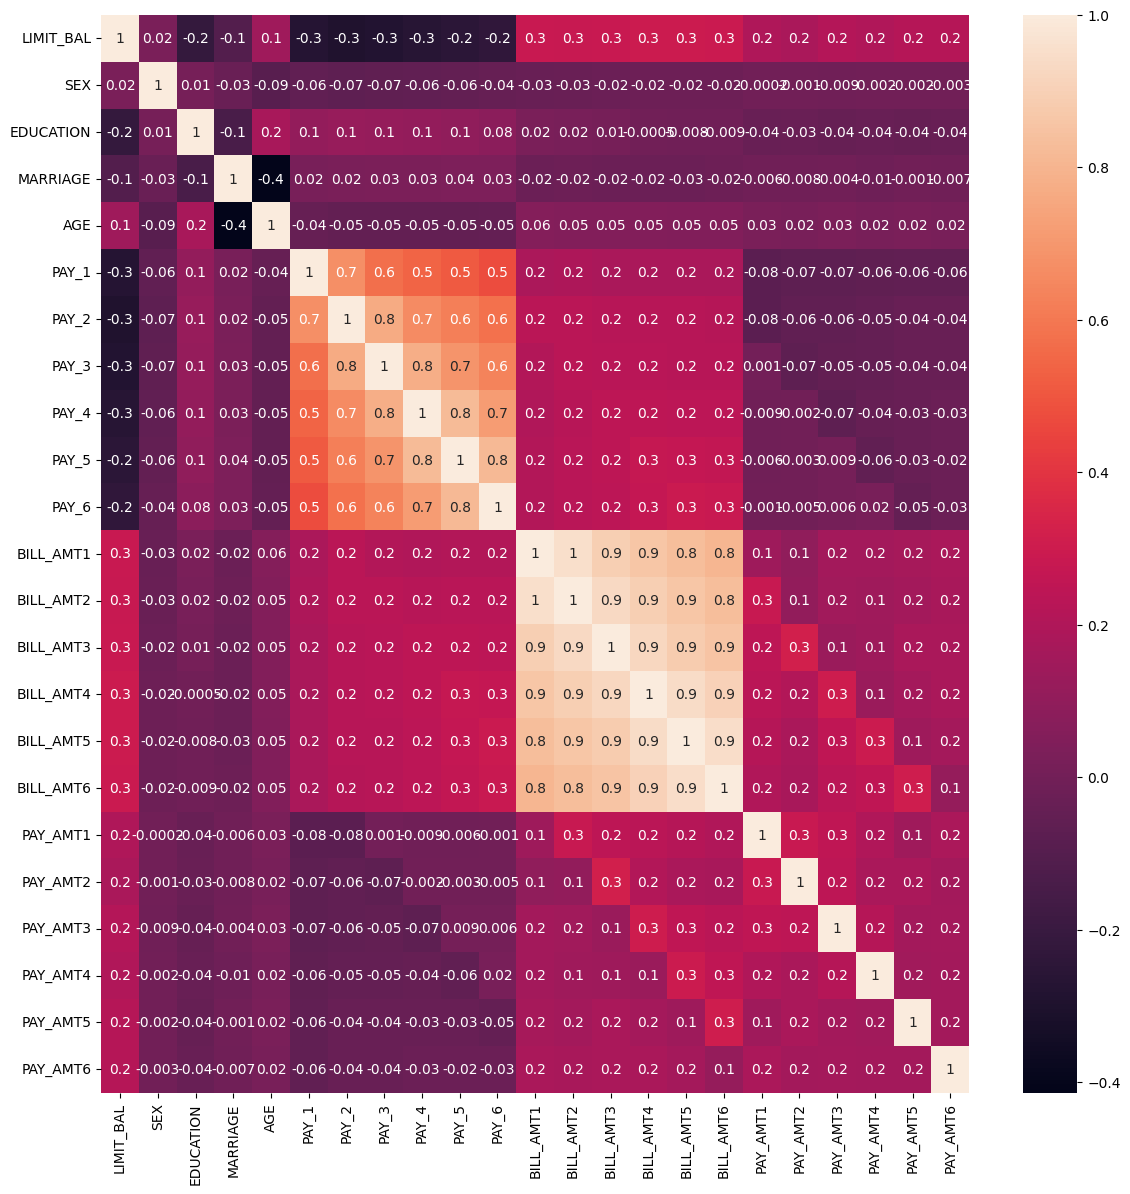

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot = True, fmt='.1g')

각 속성끼리 상관도가 매우 높음. 소수의 PCA만으로도 자연스럽게 속성들의 변동성을 나타낼 수 있으므로 이 BILL_AMT1 〜 BILL_AMT6까지 6개 속성을 2개의 컴포넌트로 PCA 변환한 뒤 개별 컴포넌트의 변동성을 explained_variance_ratio_ 로 나타냄

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT' + str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을  가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성: ', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성:  [0.90555253 0.0509867 ]


단 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명할 수 있으며 특히 첫 번째 PCA 축으로 90%의 변동성을 수용할 정도로 이 6개 속성의 상관도가 매우 높음

In [31]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators= 300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV = 3인 경우의 개별 Fold세트별 정확도:', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV = 3인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행.
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV = 3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV = 3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7912 0.7974 0.802 ]
PCA 변환 데이터 평균 정확도:0.7969


전체 23개 속성의 약 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측 결과보다 약 1〜2% 정도의 예측 성능 저하만 발생

1〜2%의 예측 성능 저하는 미비한 성능 저
하로 보기는 힘들지만, 전체 속성의 1/4 정도만으로도 이 정도 수치의 예측 성능을 유지할 수 있다는 것은 PCA의 뛰어난 압축 능력을 잘 보여주는 것

# LDA

LDA(Linear Discriminant Analysis) - 선형 판별 분석법 (PCA와 매우 유사)

- 유사점: PCA와유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법

- 차이점: LDA는 지도학습의 분류(Classification)에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소함. PCA는 입력 데이터의 변동성의 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음.

LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class
scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원을 축소함
즉, 클래스 간분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식

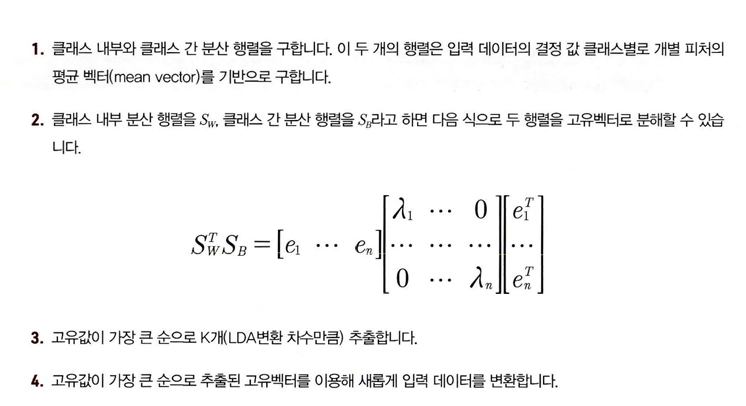

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [10]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


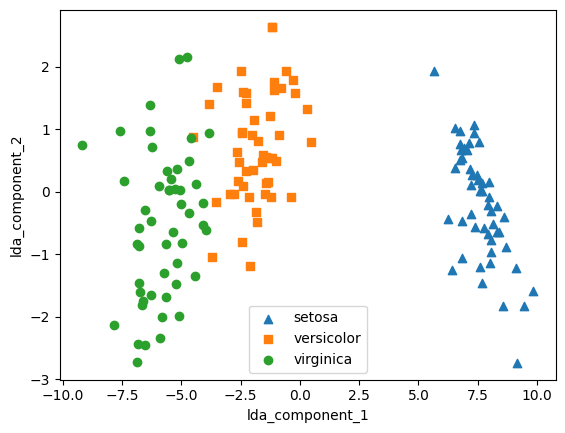

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은  0, versicolor는 1, virginica는 2. 각 targat별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

# SVD(Singular Value Decomposition) - 특이값 분해

SVD 역시 PCA와 유사한 행렬 분해 기법을 이용함. PCA의 경우 정방행렬(즉, 행과 열의 크기가
같은 행렬)만을 고유벡터로 분해할 수 있지만, SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용 가능.

In [12]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4x4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [13]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [14]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [15]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [16]:
# 다시 SVD를 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [17]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [18]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SvD를 적용할 경우, U, Sigma, Vt의 차원 확인
np.random.seed(21)
matrix = np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.04872488 0.28910966 0.72096635 0.02161625 0.20592277 0.05077326]
 [0.30227189 0.66391029 0.30811439 0.58359128 0.06957095 0.86740448]
 [0.13324052 0.17812466 0.49592955 0.86369964 0.75894384 0.97048513]
 [0.75930255 0.38425003 0.40871833 0.71336043 0.27066977 0.85410287]
 [0.91316397 0.76075607 0.51666854 0.16783577 0.29869229 0.28394305]
 [0.32721258 0.46014033 0.54436836 0.21740087 0.79986833 0.72668445]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [2.95668773 1.02918132 0.80828638 0.48142609 0.37477594 0.13880505]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.48142609 0.80828638 1.02918132 2.95668773]

Truncated SVD로 분해 후 복원 행렬:
 [[ 0.00222862  0.3867835   0.63436996 -0.04337066  0.24736598  0.09490969]
 [ 0.34727072  0.57086908  0.3926838   0.65882151  0.03175713  0.81319366]
 [ 0.12037082  0.19718315  0.46787356  0.77953705  0.75810557  1.0443682 ]
 [ 0.70042425  0.51277316  0.30154029  0.67120853  0.33061613  0.87258649]
 [ 0.92352374  0.73253

Text(0, 0.5, 'TruncatedSVD Component 2')

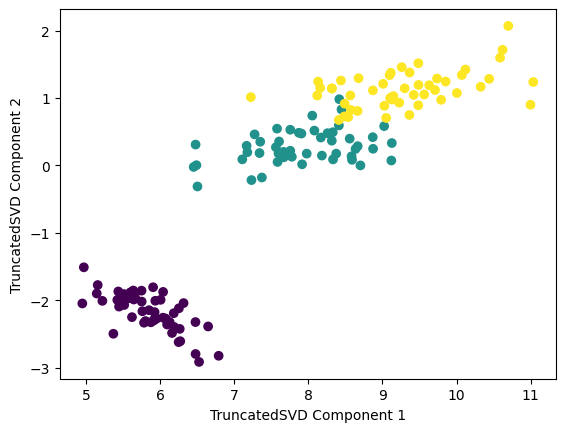

In [19]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

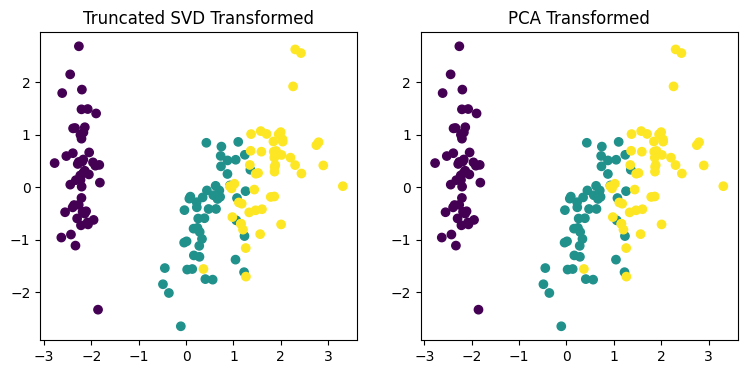

In [22]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_sclae = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_sclae)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [23]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_-tsvd.components_).mean())

2.3447794631851576e-15
-9.71445146547012e-17


# NMF(Non - Negative Matrix Factorization)

NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 (Low—Rank Approximation) 방식의
변형.
NMF는 원본 행렬 내의 모든 원소 값이 모두 양수(0 이상)라는 게 보장되면 다음과 같이 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭함.

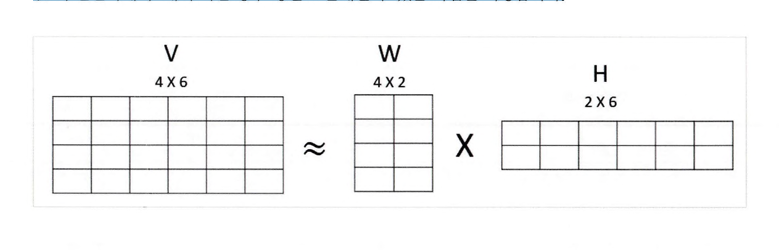

4 X 6 원본 행렬 V는 4 X 2 행렬 W와 2 X 6 행렬 H로 근사해 분해될 수 있음

행렬 분해（Matrix
Factorization）는 일반적으로 SVD와 같은 행렬 분해 기법을 통칭함.

행렬 분해를
하게 되면 W 행렬과 H 행렬은 일반적으로 길고 가는 행렬 W（즉, 원본 행렬의 행 크기와 같고 열 크기보다 작은 행렬와 작고 넓은 행렬 H（원본 행렬의 행 크기보다 작고 열 크기와 같은 행렬）로 분해됨.

이렇게 분해된 행렬은 잠재 요소를 특성으로 가지게 됨
분해 행렬 W는 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지에 대응하며, 분해 행렬 H는 이 잠재 요소가 원본 열（즉, 원본 속성）로
어떻게 구성됐는지를 나타내는 행렬

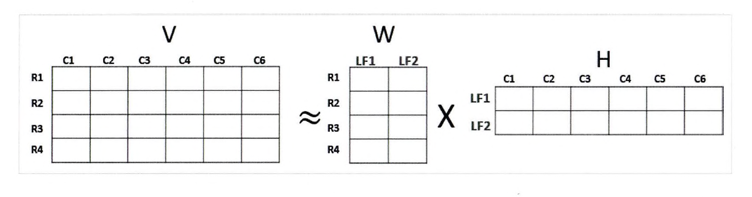

NMF는 SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트의 토픽 도
출 등의 영역에서 사용되고 있음

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

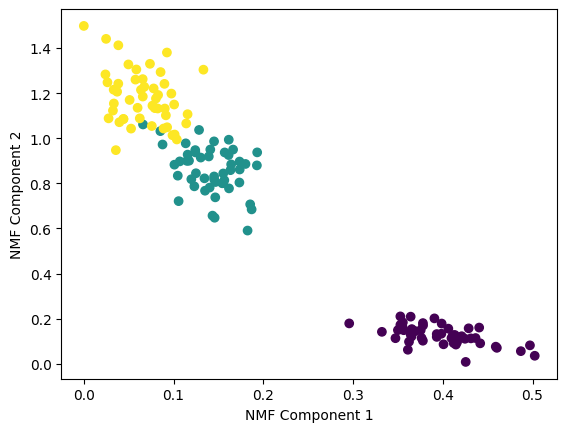

In [26]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:, 0], y= iris_nmf[:, 1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')